In [365]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Labling Time Series, Exporting Graphics (zimoma)
Use snb-data-zimoma-en-all-20170502_1430.csv to complete the following exercise:

Add the following information to the time series plot of the 1TGT data:
- 1973-11: Oil Price Shock

- 1991-01 – 1993-12: Recession in Switzerland

- 2009-01 – 2009-12: Recession in Switzerland

- 2008-09: Lehman-Brothers collapse

- 2011-08: Introduction of CHF/EUR floor

- 2015-01: Removal of CHF/EUR floor

(Matplotlib hints: http://matplotlib.org/users/annotations.html, axhspan )

Export your graphics, and put together a PowerPoint (or equivalent) presentation to highlight the effect of the events above on the money-market rates. Try with different typefaces, remember the grid when laying the result out.

In [337]:
df_o = pd.read_csv("snb-data-zimoma-en-all-20170502_1430.csv")
df_o.head()

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.0
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN


In [339]:
df_o['Date'] = pd.to_datetime(df_o['Date'])
tdf = df_o.set_index(['Date', 'D0']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
tdf = tdf[term_order]
tdf.head()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
tdf.tail()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
2016-12-01,-0.728531,-0.90,-0.7990,-0.912,-0.7292,0.99789,-0.04657,0.36663,-0.33643,-0.6626,-0.4990
2017-01-01,-0.737887,-0.90,-0.7884,-0.880,-0.7286,1.03456,-0.00957,0.35588,-0.34357,-0.6642,-0.5086
2017-02-01,-0.728683,-0.95,-0.8008,-0.892,-0.7262,1.06400,-0.01043,0.35650,-0.35286,-0.6764,-0.5228
2017-03-01,-0.736851,-0.95,-0.7792,-0.912,-0.7296,1.14956,0.02593,0.33744,-0.35786,-0.6638,-0.4946
2017-04-01,-0.730912,-0.90,-0.7918,-0.943,-0.7300,1.17233,0.00243,0.32525,-0.36286,-0.6648,-0.4916


In [381]:
df = tdf.reset_index()
df = df[['Date','1TGT']]
df = df.set_index('Date')
df

D0,1TGT
Date,
1972-01-01,0.000
1972-02-01,0.000
1972-03-01,0.125
1972-04-01,0.250
1972-05-01,1.500
...,...
2016-12-01,-0.900
2017-01-01,-0.900
2017-02-01,-0.950


In [440]:
from matplotlib.ticker import FuncFormatter
def date_format(x, pos):
    idx = tdf.reset_index()['Date'].dt.strftime('%Y-%m')
    #if x >= len(idx):
    #    return ""
    return idx.iloc[int(x)]
formatter = FuncFormatter(date_format)

In [441]:
tdf.reset_index()['Date'].dt.strftime('%Y-%m')

0      1972-01
1      1972-02
2      1972-03
3      1972-04
4      1972-05
        ...   
539    2016-12
540    2017-01
541    2017-02
542    2017-03
543    2017-04
Name: Date, Length: 544, dtype: object

In [ ]:
 1991-01 – 1993-12: Recession in Switzerland

- 2009-01 – 2009-12: Recession in Switzerland

- 2008-09: Lehman-Brothers collapse

- 2011-08: Introduction of CHF/EUR floor

- 2015-01: Removal of CHF/EUR floor

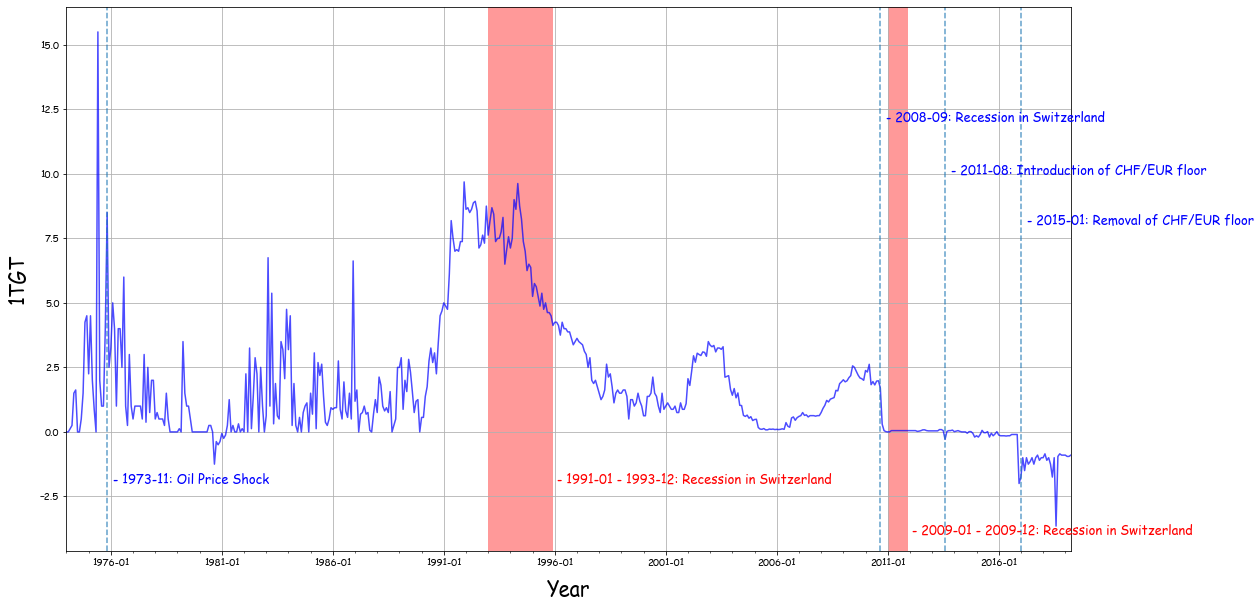

In [469]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Comic Sans MS'


ax= tdf['1TGT'].plot(figsize=(18,10), color = "b", alpha = 0.7)
ax.xaxis.set_major_formatter(formatter)
# Annotate
ax.axvline("1973-11-01", linestyle='dashed', alpha=0.7)
ax.text("1973-12-01", y=-2, s=' - 1973-11: Oil Price Shock',  color='b', size=13)

ax.axvspan("1991-01-01", "1993-12-01", facecolor='r', alpha=0.4)
ax.text("1993-12-01", y=-2, s=' - 1991-01 - 1993-12: Recession in Switzerland',  color='r', size=13)

ax.axvspan("2009-01-01", "2009-12-01", facecolor='r', alpha=0.4)
ax.text("2009-12-01", y=-4, s=' - 2009-01 - 2009-12: Recession in Switzerland',  color='r', size=13)

ax.axvline("2008-09-01", linestyle='dashed', alpha=0.7)
ax.text("2008-10-05", y=12, s=' - 2008-09: Recession in Switzerland',  color='b', size=13)

ax.axvline("2011-08-01", linestyle='dashed', alpha=0.7)
ax.text("2011-09-05", y=10, s=' - 2011-08: Introduction of CHF/EUR floor', color='b', size=13)

ax.axvline("2015-01-01", linestyle='dashed', alpha=0.7)
ax.text("2015-02-05", y=8, s=' - 2015-01: Removal of CHF/EUR floor',  color='b', size=13)

ax.set_xlabel('Year',fontsize=15,size=20, labelpad=10)
ax.set_ylabel('1TGT',fontsize=15,size=20,labelpad=10)
plt.grid(True)

### 2. Labling Scatterplot (mpg.csv)

Use mpg.csv to complete the following exercise:

Yesterday, you made a plots of displacement vs. highway fuel efficiency for all cars in the data set. Improve these plots by emphasizing and annotating the cars with the best/worst hwy efficiency.

- One plot with all cars; emphasize/annotate the cars with the best and worst hwy efficiency

- A plot faceted by class with the best and worst hwy efficiency in the class emphasized/annotated

In [693]:
df = pd.read_csv("mpg.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [471]:
mean_displ = df.groupby(["class"]).mean()['displ'].reset_index()
mean_displ.columns=['class','mean_displ']
#mean_displ.mean_displ = mean_displ.mean_displ/max(mean_displ.mean_displ)
mean_displ

,class,mean_displ
0,2seater,6.160000
1,compact,2.325532
2,midsize,2.921951
3,minivan,3.390909
4,pickup,4.418182
5,subcompact,2.660000
6,suv,4.456452


In [472]:
classes = mean_displ['class']
classes

0       2seater
1       compact
2       midsize
3       minivan
4        pickup
5    subcompact
6           suv
Name: class, dtype: object

In [622]:
df[df["hwy"] == 12]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [473]:
df1=df.merge(mean_displ, on ='class')
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_displ
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.325532
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.325532
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.325532
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.325532
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.325532
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.660000
230,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,2.660000
231,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,2.660000
232,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,2.660000


In [104]:
for i in classes:
    df1=df[df['class'] == i]
    alpha = int(mean_displ['mean_displ'][mean_displ['class'] == i].values*10)**3
    print(alpha)

1000
27
64
125
343
64
343


In [549]:
max_h=df[df["hwy"] == 44]["model"].values[0]

In [610]:
min_h=df[df["hwy"] == 12]["model"].values[0]

'dakota pickup 4wd'

In [698]:
df['hwy'].min()
df['displ'].loc[df['hwy'].idxmin()]

4.7

### One plot with all cars; emphasize/annotate the cars with the best and worst hwy efficiency

Text(6, 20, 'Worst efficiency')

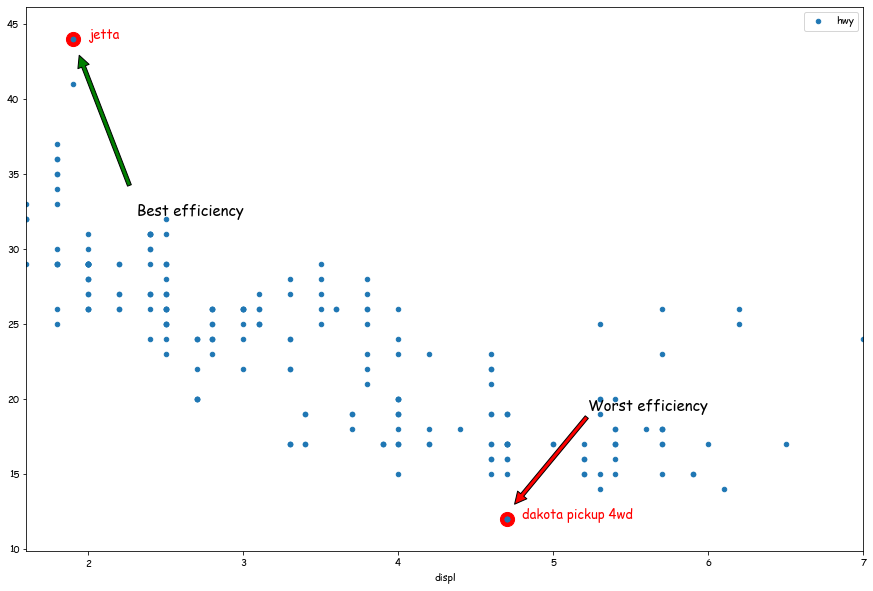

In [767]:

ax=df.plot('displ', 'hwy', style='.', ms=9,figsize=(15,10));
ax.scatter([1.9,4.7], [44,12], color="r", s=200, marker='o')
ax.text(x=df[df["hwy"] == 44]["displ"].unique()+.1, y=df["hwy"].max(), s=df[df["hwy"] == 44]["model"].values[0],  color='r', size=13)
ax.text(x=df[df["hwy"] == 12]["displ"].unique()+.1, y=df["hwy"].min(), s=df[df["hwy"] == 12]["model"].values[0],  color='r', size=13)
ax.annotate('Best efficiency', xy=(1.9, 44),  xycoords='data',
            xytext=(3, 33), textcoords='data',arrowprops=dict(facecolor='g', shrink=0.1),size=15,
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('Worst efficiency', xy=(4.75, 13),  xycoords='data',
            xytext=(6, 20), textcoords='data',arrowprops=dict(facecolor='r', shrink=1),size=15,
            horizontalalignment='right', verticalalignment='top',
            )



(0, 8)

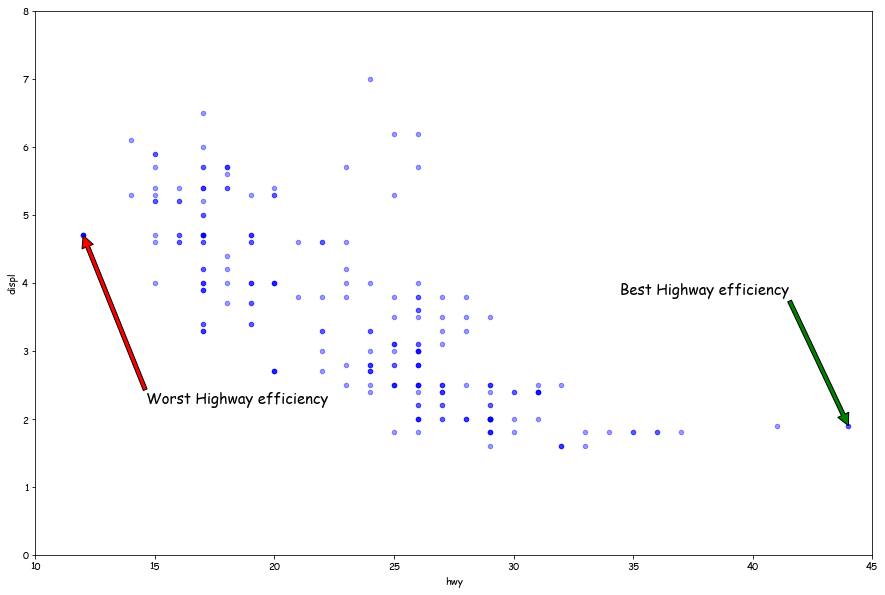

In [1026]:

fig, ax = plt.subplots(1,1)
ax = df.plot.scatter('hwy', 'displ', style='.',figsize=(15,10), ax=ax, c="b", alpha=0.4)
ax.annotate('Best Highway efficiency', xy=(df['hwy'].max(),df['displ'].loc[df['hwy'].idxmax()]),  xycoords='data',
            xytext=(0.9, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='g', shrink=1),
            horizontalalignment='right', verticalalignment='top',size=15,
            )
ax.annotate('Worst Highway efficiency', xy=(df['hwy'].min(),df['displ'].loc[df['hwy'].idxmin()]),  xycoords='data',
            xytext=(0.35, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=1),
            horizontalalignment='right', verticalalignment='top',size=15,
            )
ax.set_xlim([10,45])
ax.set_ylim([0,8])

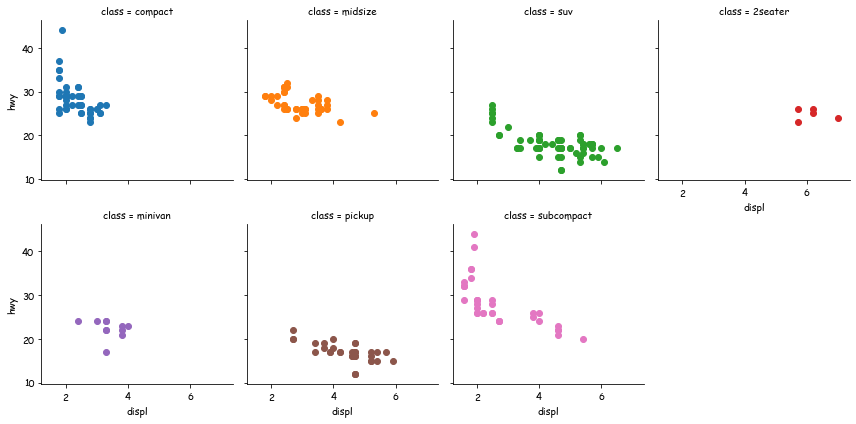

In [640]:
g = sns.FacetGrid(df, col='class', hue='class',col_wrap=4)
g.map(plt.scatter,'displ', 'hwy')


In [657]:
#g = sns.FacetGrid(df, col='class', col_wrap=4),
#_ = g.map(facet_plot, 'displ', 'hwy')

In [671]:
classes= df.groupby('class')


### A plot faceted by class with the best and worst hwy efficiency in the class emphasized/annotated

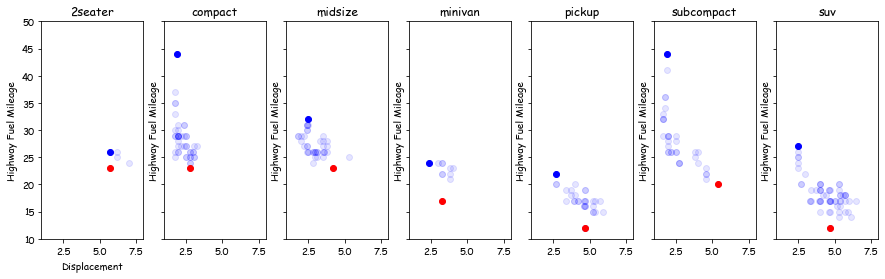

In [776]:
fig, axs = plt.subplots(1, 7, figsize=(15, 4), sharex=True, sharey=True)

index = 0
for name, cl in classes:
    ax = axs[index]
    ax.plot(cl['displ'], cl['hwy'], marker='.', linestyle='', ms=12, label=name, alpha=0.1, color='b')
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if index < 1:
        ax.xaxis.set_label_text('Displacement')
    ax.yaxis.set_label_text('Highway Fuel Mileage')
    index += 1
    
    max_hwy = cl.loc[cl['hwy'].idxmax()]
    min_hwy = cl.loc[cl['hwy'].idxmin()]
    
    ax.plot(max_hwy['displ'], max_hwy['hwy'], marker='.', linestyle='', ms=12, label=name, color='b')
  
    ax.plot(min_hwy['displ'], min_hwy['hwy'], marker='.', linestyle='', ms=12, label=name, color='r')
    

  


## 3 Anscombe (anscombe.csv)

Use anscombe.csv to complete the following exercise:

-Load in the anscombe.csv data

-There are 4 data sets in the file (indicated by the dataset column): what is the mean x, and mean y for each data set?

-Compute a linear regression for each data set. What is the slope and intercept?

-Plot the data, faceted by data set (i.e., 4 subplots), drawing the points at their specified x/y values, and draw regression lines. Label the regression lines with slope, intercept, and r^2.

### Load in the anscombe.csv data

In [799]:
df1 = pd.read_csv('anscombe.csv')
df1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [955]:
df1.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [972]:
df1.groupby(df1.dataset).head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
33,IV,8.0,6.58


### There are 4 data sets in the file (indicated by the dataset column): what is the mean x, and mean y for each data set?

In [973]:
# Group by data set, and compute aggregate statistical functions
df1.groupby(df1.dataset).aggregate(['count', 'mean', 'std'])

x                    y                    
        count mean       std count      mean       std
dataset                                               
I          11  9.0  3.316625    11  7.500909  2.031568
II         11  9.0  3.316625    11  7.500909  2.031657
III        11  9.0  3.316625    11  7.500000  2.030424
IV         11  9.0  3.316625    11  7.500909  2.030579

In [800]:
df1_mean=df1.groupby(['dataset']).mean()
df1_mean

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [959]:
x = df1.x.as_matrix()
y = df1.y.as_matrix()

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [961]:
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5., 10.,  8.,
        13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5., 10.,  8., 13.,  9.,
        11., 14.,  6.,  4., 12.,  7.,  5.,  8.,  8.,  8.,  8.,  8.,  8.,
         8., 19.,  8.,  8.,  8.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68,  9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,
         3.1 ,  9.13,  7.26,  4.74,  7.46,  6.77, 12.74,  7.11,  7.81,
         8.84,  6.08,  5.39,  8.15,  6.42,  5.73,  6.58,  5.76,  7.71,
         8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,  7.91,  6.89]))

### Plot the data, faceted by data set (i.e., 4 subplots), drawing the points at their specified x/y values, and draw regression lines. Label the regression lines with slope, intercept, and r^2

In [1014]:
import scipy.stats as st
# Compute Correlations
pr = st.pearsonr(x, y)
pr_sq=st.pearsonr(x, y)[0]**2
pr = [np.round(c, 2) for c in pr]
sr = st.spearmanr(x, y)
print(pr)
print(pr_sq)
print(sr)
print(np.cov(x, y))
print(np.corrcoef(x, y))

[0.82, 0.0]
0.6664538423204793
SpearmanrResult(correlation=0.8168854813001849, pvalue=1.3609156442776403e-11)
[[10.23255814  5.1155814 ]
 [ 5.1155814   3.8373879 ]]
[[1.         0.81636624]
 [0.81636624 1.        ]]


In [1010]:
mux = np.mean(x)
muy = np.mean(y)

# Determine best fit model parameters (from simple learn regression)
beta = np.sum((x - mux) * (y - muy)) / np.sum((x - mux)**2)
alpha = muy - beta * mux

# Compute Pearson's r correlation coefficient
r = beta * np.std(x)/np.std(y)

# Display results
print(f'Best fit line: y = {beta:4.2f} x + {alpha:5.3f}')
print(f'Pearsonr correlation = {r:5.3f}')

Best fit line: y = 0.50 x + 3.001
Pearsonr correlation = 0.816


In [1025]:
slope, inter, r_val, p_val, std_err =stats.linregress(df1["x"],df1["y"])
slope, inter, r_val, p_val, std_err

(0.49993181818181825,
 3.0012954545454535,
 0.8163662427614701,
 1.4365052916298305e-11,
 0.05457315550660463)

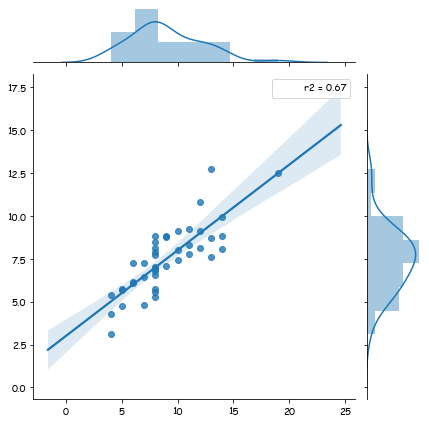

In [1012]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)


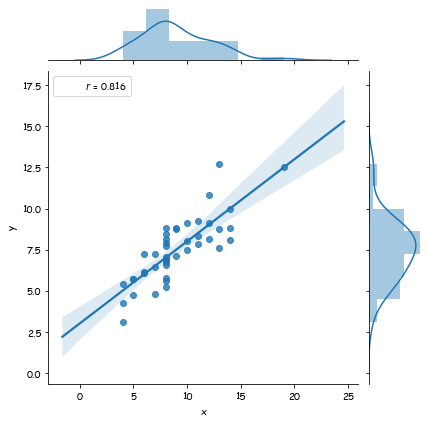

In [1008]:
sns.jointplot(x='x', y='y', data=df1, 
              stat_func=st.pearsonr,kind='reg',
              annot_kws=dict(template='{stat} = {val:4.3f}', 
                             stat='$r$', loc = 2))

Text(8, 4, 'slop=0.5, inter=3.0,r^2=0.67')

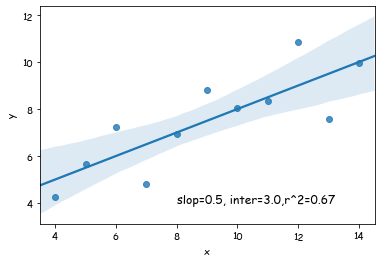

In [1018]:
import statsmodels.formula.api as sfa

#r = sfa.ols('y ~ x + 0', data=df1).fit()
text = 'slop=%s, inter=%s,r^2=%s' % (np.round(slope, 2), np.round(inter, 2), np.round(pr_sq, 2))

ax = sns.regplot(x="x", y="y", data=df1[df1["dataset"] == 'I'])
ax.text(8, 4, text, fontsize=12)





Text(8, 4, 'slop=0.5, inter=3.0,r^2=0.67')

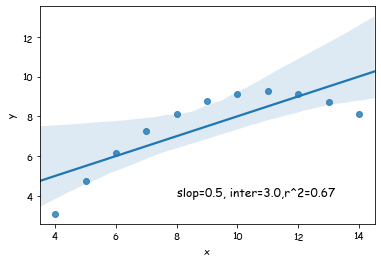

In [1020]:
text = 'slop=%s, inter=%s,r^2=%s' % (np.round(slope, 2), np.round(inter, 2), np.round(pr_sq, 2))
ax = sns.regplot(x="x", y="y", data=df1[df1["dataset"] == 'II'])
ax.text(8, 4, text, fontsize=12)



Text(8, 4, 'slop=0.5, inter=3.0, r^2=0.67')

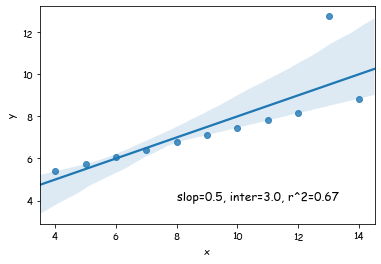

In [1022]:
text = 'slop=%s, inter=%s, r^2=%s' % (np.round(slope, 2), np.round(inter, 2), np.round(pr_sq, 2))
ax = sns.regplot(x="x", y="y", data=df1[df1["dataset"] == 'III'])
ax.text(8, 4, text, fontsize=12)

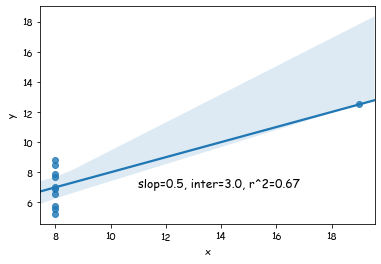

In [1024]:
text = 'slop=%s, inter=%s, r^2=%s' % (np.round(slope, 2), np.round(inter, 2), np.round(pr_sq, 2))
ax = sns.regplot(x="x", y="y", data=df1[df1["dataset"] == 'IV'])
ax.text(11, 7, text, fontsize=12)

plt.show()

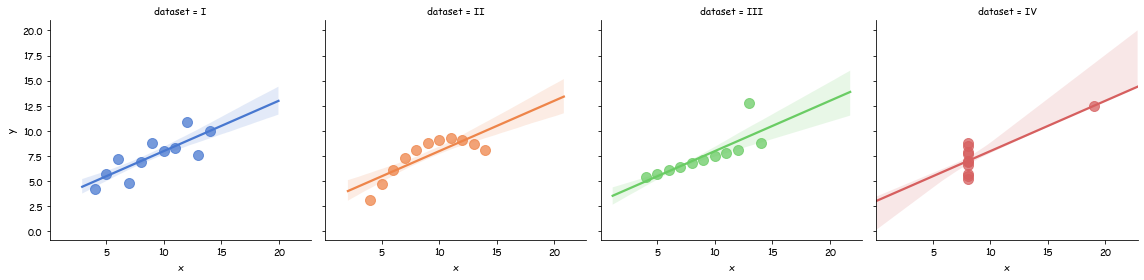

In [977]:
sns.lmplot(x="x", y="y", data=df1, col="dataset", hue= "dataset",robust=False, ci=68,  
           palette ='muted',fit_reg=True,size=4, scatter_kws = {'s': 100, 'alpha': 0.75} ) 



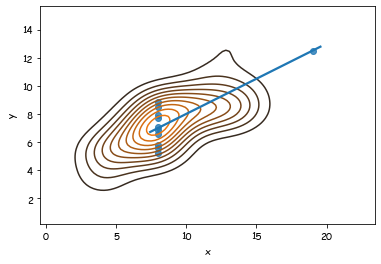

In [953]:
sns.regplot(x='x', y='y',
            ci=None, data=df1[df1["dataset"] == 'IV'])
sns.kdeplot(df1["x"], df1["y"])

In [988]:
slope, inter, r_val, p_val, std_err =stats.linregress(df1["x"],df1["y"])
slope, inter, r_val, p_val, std_err

(0.49993181818181825,
 3.0012954545454535,
 0.8163662427614701,
 1.4365052916298305e-11,
 0.05457315550660463)